In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_dataset(N, D=2, K=2):
    X = np.zeros((N * K, D))  # data matrix (each row = single example)
    y = np.zeros(N * K)  # class labels

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

    y[y == 0] -= 1

    return X, y

In [3]:
def plot_contour(X, y, svm):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = svm.predict(points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

In [5]:
import cvxopt

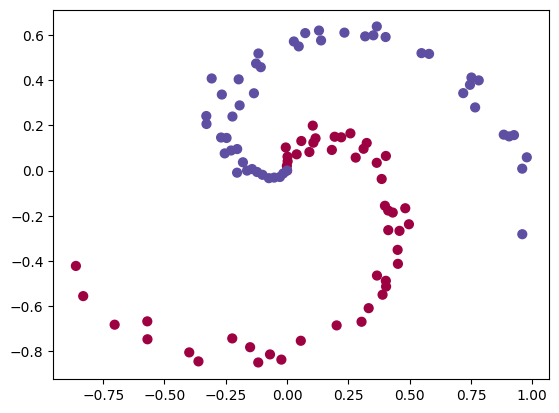

In [6]:
np.random.seed(1)
X, y = create_dataset(N=50)

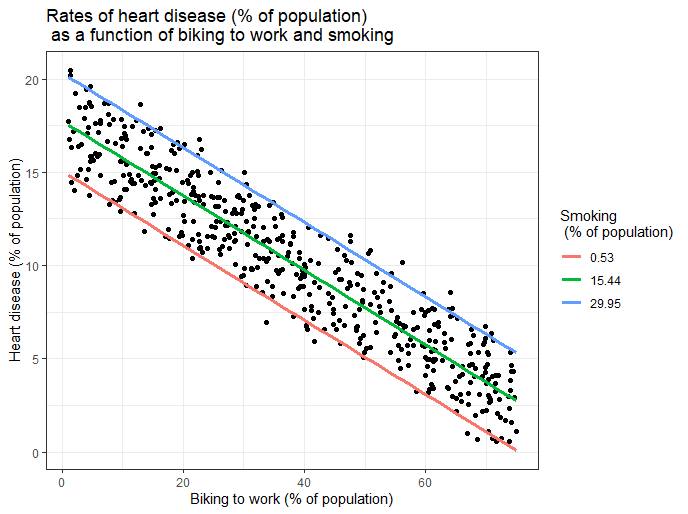
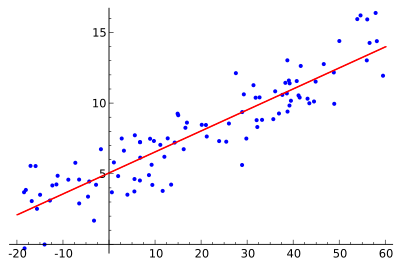

In [7]:
def linear(x, z):
    return np.dot(x, z.T)

In [ ]:
# This is a Python function that calculates the linear kernel (also known as the dot product or inner product) between two input vectors x and z.
# Linear Kernel Formula:
# The linear kernel is defined as:
# K(x, z) = x^T z
# where:
# x and z are input vectors
# Code Explanation:
# The function takes two inputs:
# x: Input vector(s)
# z: Input vector(s)
# The function returns the linear kernel value between x and z, calculated using the dot product.

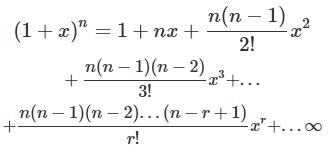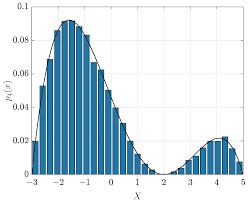
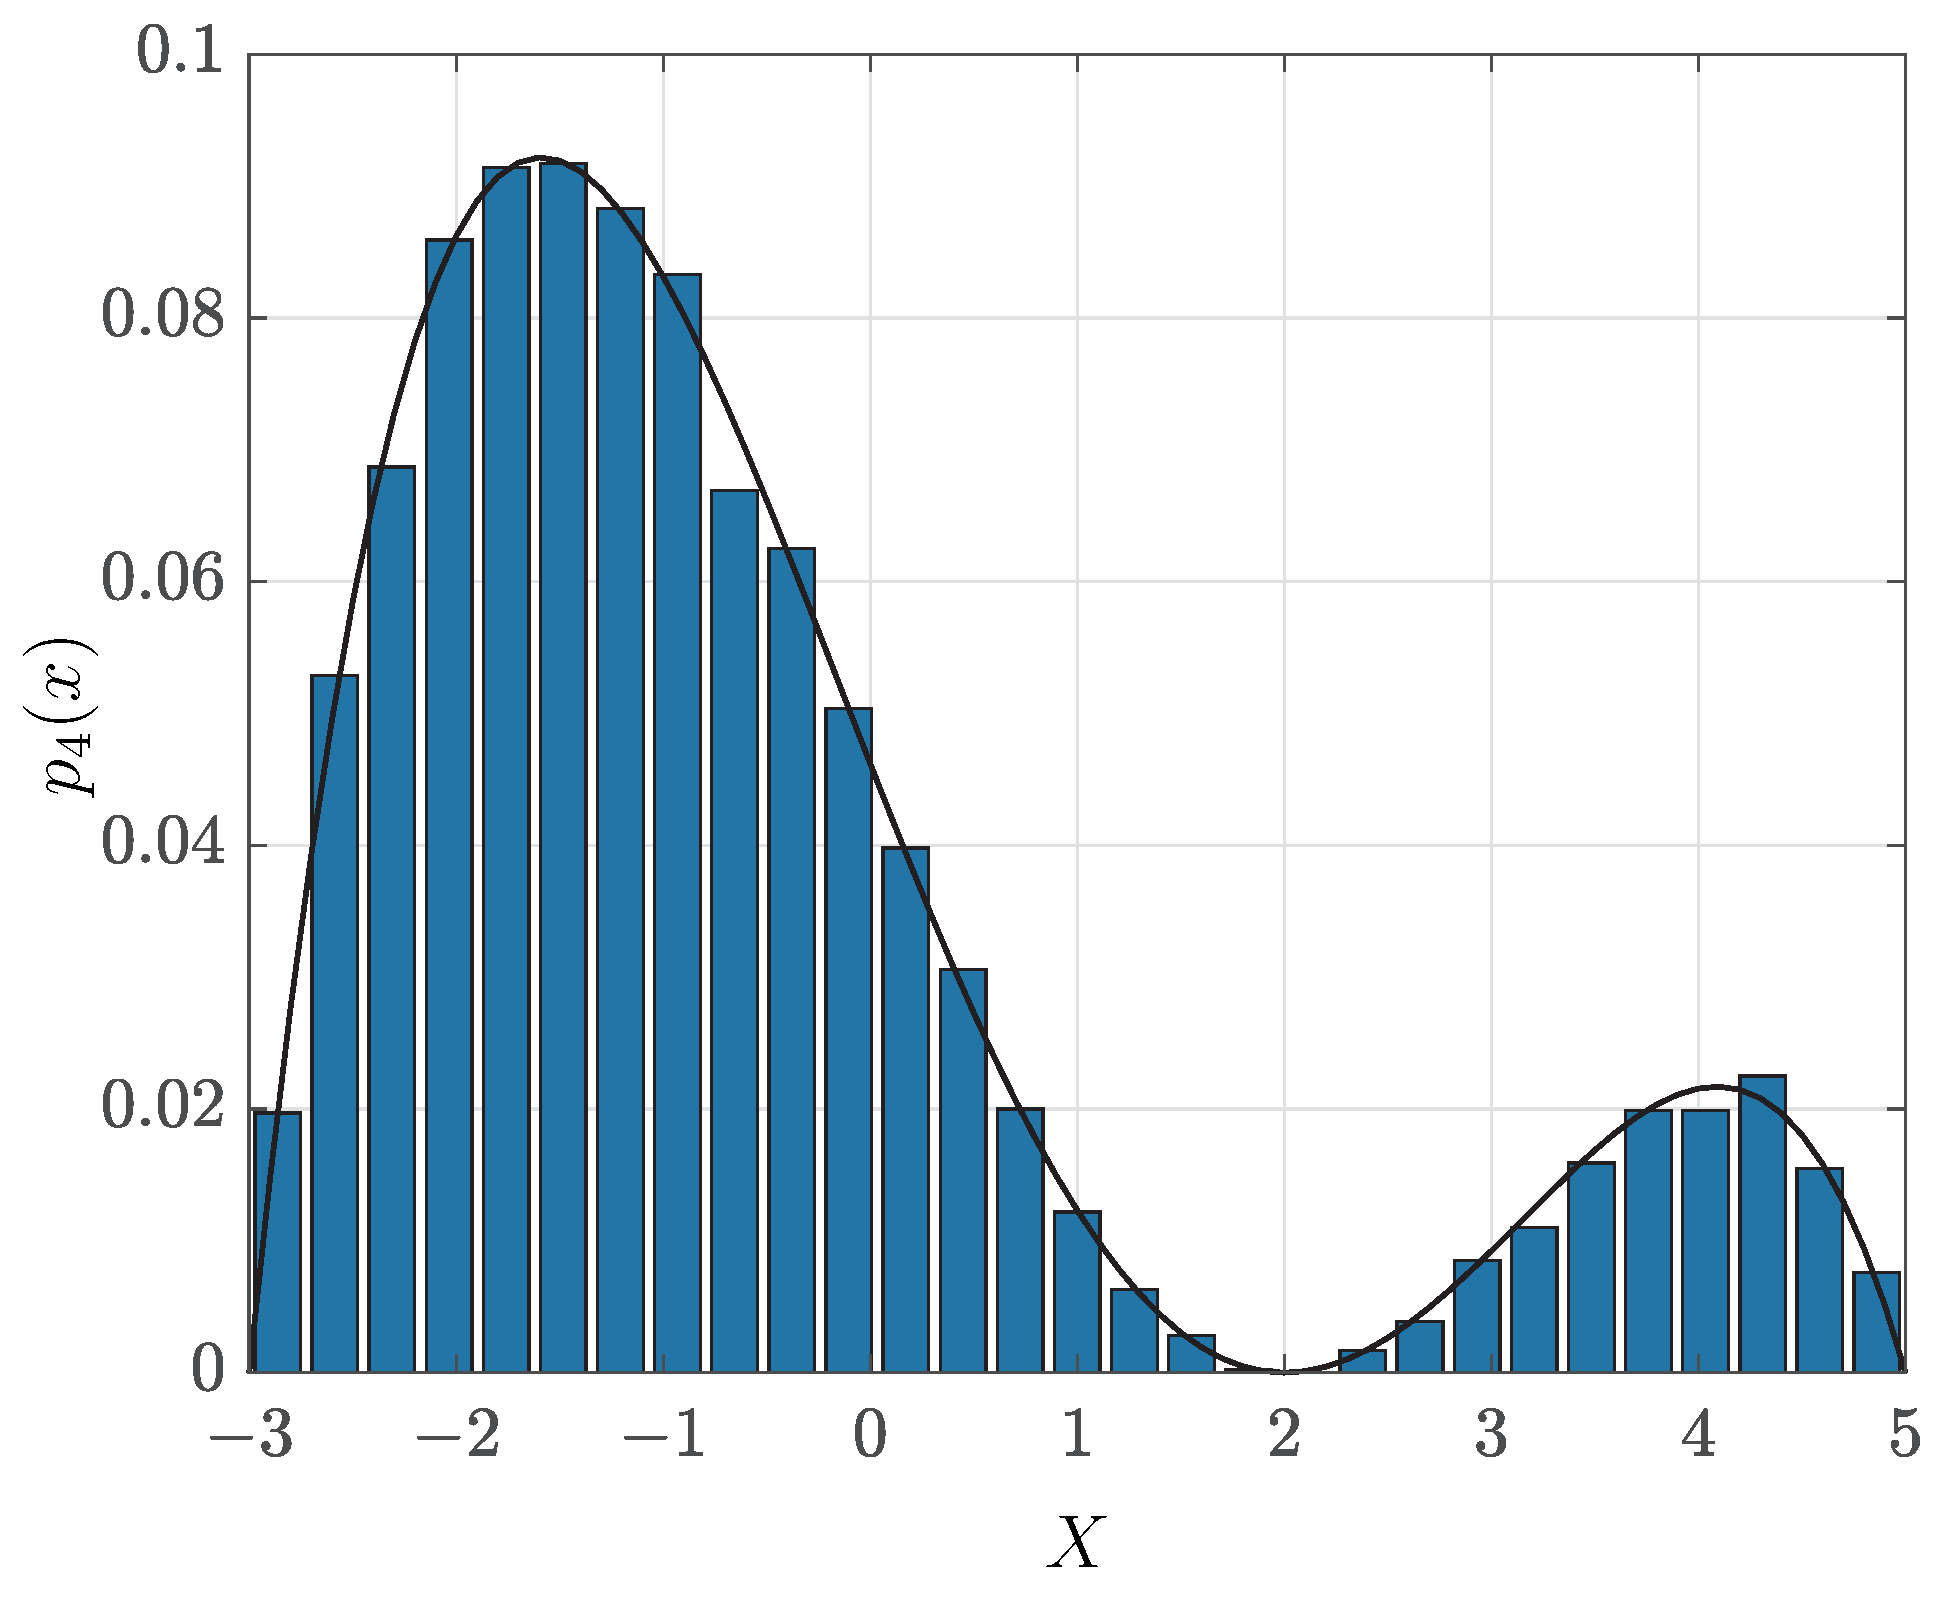

In [8]:
def polynomial(x, z, p=5):
    return (1 + np.dot(x, z.T)) ** p


In [ ]:
# This is a Python function that calculates the polynomial kernel between two input vectors x and z. The polynomial kernel is a popular kernel function used in Support Vector Machines (SVMs) and other kernel-based learning algorithms.
# Polynomial Kernel Formula:
# The polynomial kernel is defined as:
# K(x, z) = (1 + x^T z)^p
# where:
# x and z are input vectors
# p is the degree of the polynomial (default value is 5 in this implementation)
# Code Explanation:
# The function takes three inputs:
# x: Input vector(s)
# z: Input vector(s)
# p: Degree of the polynomial (optional, default value is 5)
# The function returns the polynomial kernel value between x and z, calculated using the formula above.

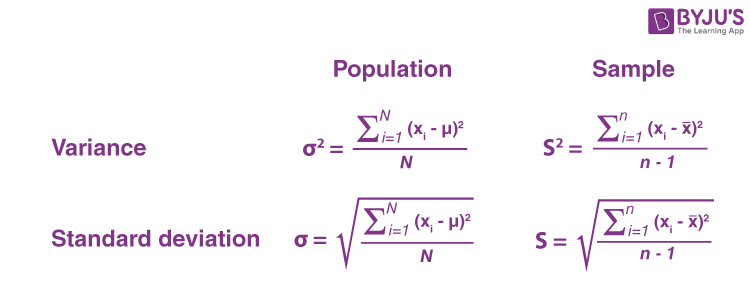

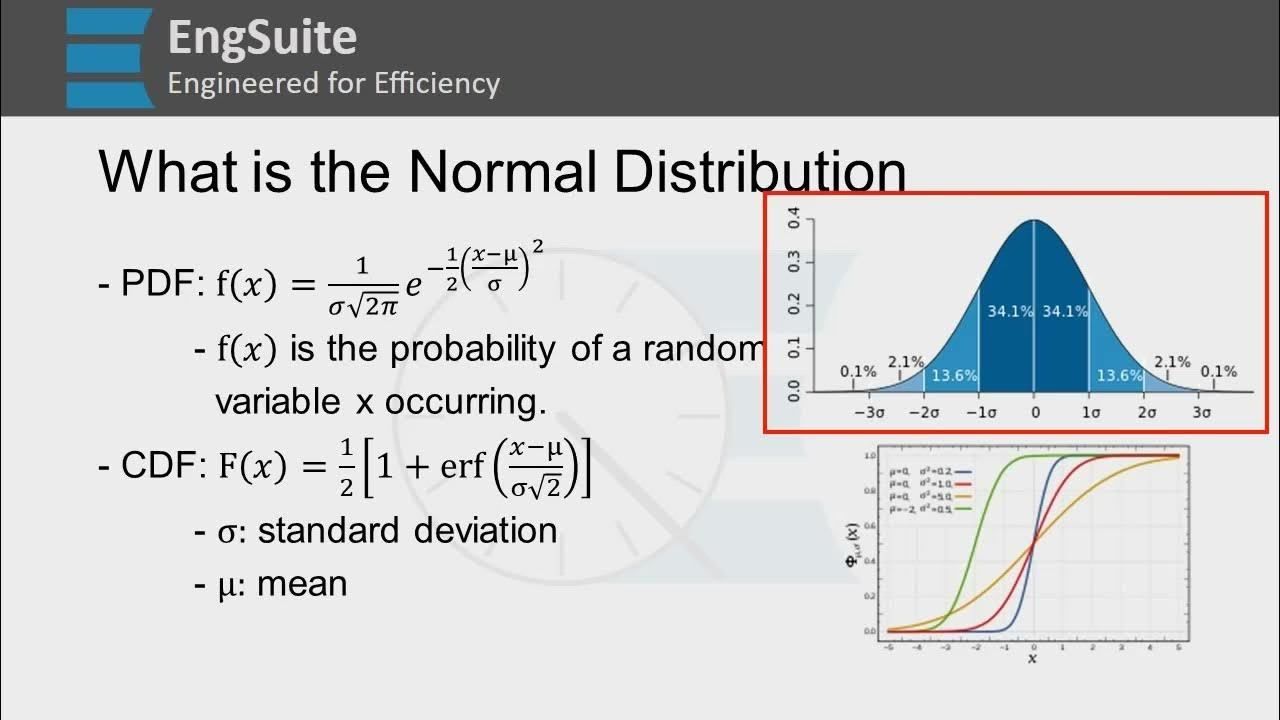

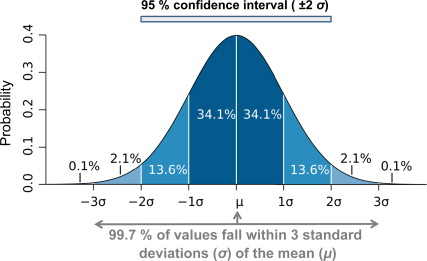!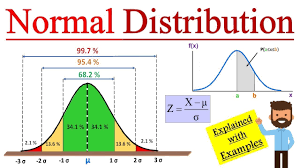

In [9]:
def gaussian(x, z, sigma=0.1):
    return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))

In [ ]:
# This code defines a Gaussian function and applies it to a dataset.
# Breakdown:
# Gaussian Function:
# Python
# def gaussian(x, z, sigma=0.1):
#     return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))
# x: Input data point(s)
# z: Center of the Gaussian distribution
# sigma: Standard deviation of the Gaussian distribution (default: 0.1)
# np.linalg.norm(x - z, axis=1): Calculates the Euclidean distance between x and z along the specified axis (in this case, axis 1)
# np.exp(...): Calculates the exponential of the input
# Applying the Gaussian Function:
# Python
# gaussian(X[0, np.newaxis], X)
# X[0, np.newaxis]: Selects the first data point from X and adds a new axis to make it a column vector
# X: The entire dataset
# gaussian(...): Applies the Gaussian function to each data point in X using the first data point as the center z
# Purpose:
# This code is likely used for:
# Calculating similarity between data points using a Gaussian kernel

In [ ]:
# The probability density function (PDF) of a Gaussian distribution is given by:
# f(x | μ, σ) = (1 / σ√(2π)) * exp(-((x - μ)^2) / (2σ^2))
# where:
# x: The value of the random variable
# μ (mu): The mean of the distribution
# σ (sigma): The standard deviation of the distribution
# Explanation:
# The Gaussian distribution is a continuous probability distribution that is symmetric about the mean (μ).
# The standard deviation (σ) determines the spread or dispersion of the distribution.
# The Gaussian distribution is also known as the normal distribution or bell curve.
# Example:
# Suppose we have a Gaussian distribution with a mean (μ) of 0 and a standard deviation (σ) of 1. The probability density function (PDF) would be:
# f(x) = (1 / √(2π)) * exp(-((x)^2) / 2)
# This is the standard normal distribution, which is widely used in statistics and probability theory.

In [10]:
kernel = gaussian

In [11]:
y = y
X = X
m, n = X.shape

In [12]:
K = np.zeros((m, m))

In [13]:
K

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 100))

In [15]:
X[0, np.newaxis]

array([[0., 0.]])

In [16]:
kernel(X[0, np.newaxis], X)

array([1.00000000e+00, 9.79390679e-01, 9.20076348e-01, 8.29093862e-01,
       7.16630794e-01, 5.94154193e-01, 4.72514129e-01, 3.60447789e-01,
       2.63743561e-01, 1.85111456e-01, 1.24622559e-01, 8.04770343e-02,
       4.98493152e-02, 2.96181796e-02, 1.68798841e-02, 9.22767933e-03,
       4.83868622e-03, 2.43374100e-03, 1.17417598e-03, 5.43380385e-04,
       2.41205195e-04, 1.02702565e-04, 4.19457394e-05, 1.64326026e-05,
       6.17499749e-06, 2.22576419e-06, 7.69543987e-07, 2.55211172e-07,
       8.11853835e-08, 2.47723921e-08, 7.25053372e-09, 2.03556016e-09,
       5.48163154e-10, 1.41594920e-10, 3.50830576e-11, 8.33794709e-12,
       1.90078400e-12, 4.15640953e-13, 8.71797922e-14, 1.75398252e-14,
       3.38490610e-15, 6.26584898e-16, 1.11256439e-16, 1.89488265e-17,
       3.09564689e-18, 4.85101310e-19, 7.29164325e-20, 1.05130882e-20,
       1.45394220e-21, 1.92874985e-22, 1.00000000e+00, 9.79390679e-01,
       9.20076348e-01, 8.29093862e-01, 7.16630794e-01, 5.94154193e-01,
      

In [17]:
# Solve with cvxopt final QP needs to be reformulated
# to match the input form for cvxopt.solvers.qp
P = cvxopt.matrix(np.outer(y, y) * K)

In [19]:
P

<100x100 matrix, tc='d'>

In [ ]:
# This code is preparing the input parameters for the cvxopt.solvers.qp function, which solves a quadratic programming problem.
# Breakdown:
# Objective Function:
# P = cvxopt.matrix(np.outer(y, y) * self.K):
# np.outer(y, y): Computes the outer product of the vector y with itself, resulting in a matrix.
# * self.K: Element-wise multiplies the matrix with the kernel matrix self.K.
# cvxopt.matrix(...): Converts the result to a cvxopt matrix.

In [20]:
q = cvxopt.matrix(-np.ones((m, 1)))

In [21]:
q

<100x1 matrix, tc='d'>

In [22]:
G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m))))

In [23]:
G

<200x100 matrix, tc='d'>

In [ ]:
# G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m)))):
# np.eye(m): Creates an identity matrix of size m x m.
# * -1: Negates the identity matrix.
# np.vstack(...): Stacks the negated identity matrix on top of the original identity matrix.
# cvxopt.matrix(...): Converts the result to a cvxopt matrix.

In [27]:
C = 1

In [28]:
h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * C)))


In [29]:
h

<200x1 matrix, tc='d'>

In [30]:
# h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * self.C))):
# np.zeros(m): Creates a vector of zeros of size m.
# np.ones(m) * self.C: Creates a vector of ones of size m and multiplies it by the value self.C.
# np.hstack(...): Stacks the zero vector and the scaled one vector horizontally.
# cvxopt.matrix(...): Converts the result to a cvxopt matrix.

In [31]:
A = cvxopt.matrix(y, (1, m), "d")
b = cvxopt.matrix(np.zeros(1))

In [32]:
A

<1x100 matrix, tc='d'>

In [33]:
b

<1x1 matrix, tc='d'>

In [ ]:
# A = cvxopt.matrix(y, (1, m), "d"): Creates a cvxopt matrix from the vector y with shape (1, m) and type "d" (dense).
# b = cvxopt.matrix(np.zeros(1)): Creates a cvxopt matrix from a zero vector of size 1.

In [34]:
cvxopt.solvers.options["show_progress"] = False

In [35]:
sol = cvxopt.solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol["x"])


In [36]:
sol

{'x': <100x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <200x1 matrix, tc='d'>,
 'z': <200x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.974551463817562e-06,
 'relative gap': 1.974551495643162e-08,
 'primal objective': -99.9999983882112,
 'dual objective': -100.00000036276266,
 'primal infeasibility': 4.440892098500626e-15,
 'dual infeasibility': 3.531835650735641e-16,
 'primal slack': 1.6117887753424646e-08,
 'dual slack': 3.6276268725873715e-09,
 'iterations': 5}

In [37]:
alphas

array([[0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.99999998],
       [0.999

In [38]:
# cvxopt.solvers.options["show_progress"] = False:
# Disables the progress output of the solver.
# sol = cvxopt.solvers.qp(P, q, G, h, A, b):
# Solves the QP problem using the qp function from cvxopt.solvers.
# The inputs are:
# P: The matrix of the quadratic objective function.
# q: The vector of the linear objective function.
# G and h: The matrices and vectors defining the inequality constraints.
# A and b: The matrices and vectors defining the equality constraints.
# self.alphas = np.array(sol["x"]):
# Extracts the solution vector x from the sol dictionary.
# Converts the solution vector to a NumPy array.
# Assigns the solution vector to the alphas attribute of the current object (self).

In [39]:
def fit(X, y):
        y = y
        X = X
        m, n = X.shape

        # Calculate Kernel
        K = np.zeros((m, m))
        for i in range(m):
            K[i, :] = kernel(X[i, np.newaxis], X)

        # Solve with cvxopt final QP needs to be reformulated
        # to match the input form for cvxopt.solvers.qp
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-np.ones((m, 1)))
        G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m))))
        h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
        A = cvxopt.matrix(y, (1, m), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options["show_progress"] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.array(sol["x"])


In [40]:
def get_parameters( alphas):
        threshold = 1e-5

        sv = ((alphas > threshold) * (alphas < C)).flatten()
        w = np.dot(X[sv].T, alphas[sv] * y[sv, np.newaxis])
        b = np.mean(
            y[sv, np.newaxis]
            - alphas[sv] * y[sv, np.newaxis] * K[sv, sv][:, np.newaxis]
        )
        return sv

In [ ]:
# alphas: The Lagrange multipliers obtained from the quadratic programming solver.
# Returned Values:
# sv: A boolean mask indicating the support vectors.
# Calculations:
# sv = ((alphas > threshold) * (alphas < C)).flatten():
# Identifies the support vectors by checking if the corresponding Lagrange multipliers (alphas) are within the range (threshold, C).
# threshold is a small value (1e-5) used to avoid numerical issues.
# C is the regularization parameter.
# w = np.dot(X[sv].T, alphas[sv] * y[sv, np.newaxis]):
# Computes the weight vector (w) by taking the dot product of the support vectors (X[sv]) and the corresponding Lagrange multipliers (alphas[sv]) multiplied by the target values (y[sv, np.newaxis]).
# b = np.mean(y[sv, np.newaxis] - alphas[sv] * y[sv, np.newaxis] * K[sv, sv][:, np.newaxis]):
# Calculates the bias term (b) by taking the mean of the difference between the target values (y[sv, np.newaxis]) and the product of the Lagrange multipliers (alphas[sv]), target values (y[sv, np.newaxis]), and the kernel matrix (K[sv, sv]) evaluated at the support vectors.

In [41]:
def predict( X):
        y_predict = np.zeros((X.shape[0]))
        sv = get_parameters(alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                alphas[sv]
                * y[sv, np.newaxis]
                * kernel(X[i], X[sv])[:, np.newaxis]
            )

        return np.sign(y_predict + b)

In [ ]:
# X: The new data to make predictions on.
# Returned Values:
# The predicted class labels for the input data.
# Calculations:
# y_predict = np.zeros((X.shape[0])): Initializes an array to store the predicted values.
# sv = get_parameters(alphas): Retrieves the support vectors using the get_parameters function.
# The function then iterates over each sample in the input data X:
# For each sample, it calculates the predicted value y_predict[i] using the following formula:
# y_predict[i] = np.sum(alphas[sv] * y[sv, np.newaxis] * kernel(X[i], X[sv])[:, np.newaxis])
# This formula computes the weighted sum of the kernel evaluations between the current sample X[i] and the support vectors X[sv]. The weights are the Lagrange multipliers alphas[sv] multiplied by the corresponding target values y[sv, np.newaxis].
# Finally, the function returns the predicted class labels by taking the sign of the predicted values y_predict plus the bias term b:
# return np.sign(y_predict + b)

In [43]:
fit(X, y)
y_pred = predict(X)


In [ ]:
#   plot_contour(X, y, svm)

#     print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")